### Step 1: Importing and Merging Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns", None)
pd.set_option('display.max_rows', None)

In [3]:
quote_conversion = pd.read_csv("train.csv")
quote_conversion.head()

,QuoteNumber,Original_Quote_Date,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,CoverageField5A,CoverageField5B,CoverageField6A,CoverageField6B,CoverageField8,CoverageField9,CoverageField11A,CoverageField11B,SalesField1A,SalesField1B,SalesField2A,SalesField2B,SalesField3,SalesField4,SalesField5,SalesField6,SalesField7,SalesField8,SalesField9,SalesField10,SalesField11,SalesField12,SalesField13,SalesField14,SalesField15,PersonalField1,PersonalField2,PersonalField4A,PersonalField4B,PersonalField5,PersonalField6,PersonalField7,PersonalField8,PersonalField9,PersonalField10A,PersonalField10B,PersonalField11,PersonalField12,PersonalField13,PersonalField14,PersonalField15,PersonalField16,PersonalField17,PersonalField18,PersonalField19,PersonalField22,PersonalField23,PersonalField24,PersonalField25,PersonalField26,PersonalField27,PersonalField28,PersonalField29,PersonalField30,PersonalField31,PersonalField32,PersonalField33,PersonalField34,PersonalField35,PersonalField36,PersonalField37,PersonalField38,PersonalField39,PersonalField40,PersonalField41,PersonalField42,PersonalField43,PersonalField44,PersonalField45,PersonalField46,PersonalField47,PersonalField48,PersonalField49,PersonalField50,PersonalField51,PersonalField52,PersonalField53,PersonalField54,PersonalField55,PersonalField56,PersonalField57,PersonalField58,PersonalField59,PersonalField60,PersonalField61,PersonalField62,PersonalField63,PersonalField64,PersonalField65,PersonalField66,PersonalField67,PersonalField68,PersonalField69,PersonalField70,PersonalField71,PersonalField72,PersonalField73,PersonalField74,PersonalField75,PersonalField76,PersonalField77,PersonalField78,PersonalField79,PersonalField80,PersonalField81,PersonalField82,PersonalField83,PersonalField84,PropertyField1A,PropertyField1B,PropertyField2A,PropertyField2B,PropertyField3,PropertyField4,PropertyField5,PropertyField6,PropertyField7,PropertyField8,PropertyField9,PropertyField10,PropertyField11A,PropertyField11B,PropertyField12,PropertyField13,PropertyField14,PropertyField15,PropertyField16A,PropertyField16B,PropertyField17,PropertyField18,PropertyField19,PropertyField20,PropertyField21A,PropertyField21B,PropertyField22,PropertyField23,PropertyField24A,PropertyField24B,PropertyField25,PropertyField26A,PropertyField26B,PropertyField27,PropertyField28,PropertyField29,PropertyField30,PropertyField31,PropertyField32,PropertyField33,PropertyField34,PropertyField35,PropertyField36,PropertyField37,PropertyField38,PropertyField39A,PropertyField39B,GeographicField1A,GeographicField1B,GeographicField2A,GeographicField2B,GeographicField3A,GeographicField3B,GeographicField4A,GeographicField4B,GeographicField5A,GeographicField5B,GeographicField6A,GeographicField6B,GeographicField7A,GeographicField7B,GeographicField8A,GeographicField8B,GeographicField9A,GeographicField9B,GeographicField10A,GeographicField10B,GeographicField11A,GeographicField11B,GeographicField12A,GeographicField12B,GeographicField13A,GeographicField13B,GeographicField14A,GeographicField14B,GeographicField15A,GeographicField15B,GeographicField16A,GeographicField16B,GeographicField17A,GeographicField17B,GeographicField18A,GeographicField18B,GeographicField19A,GeographicField19B,GeographicField20A,GeographicField20B,GeographicField21A,GeographicField21B,GeographicField22A,GeographicField22B,GeographicField23A,GeographicField23B,GeographicField24A,GeographicField24B,GeographicField25A,GeographicField25B,GeographicField26A,GeographicField26B,GeographicField27A,GeographicField27B,GeographicField28A,GeographicField28B,GeographicField29A,GeographicField29B,GeographicField30A,GeographicField30B,GeographicField31A,GeographicField31B,GeographicField32A,GeographicField32B,GeographicField33A,GeographicField33B,GeographicField34A,GeographicField34B,GeographicField35A,GeographicField35B,GeographicField36A,GeographicFie

In [4]:
null_df = round(100*(quote_conversion.isnull().sum()/len(quote_conversion.index)), 2).to_frame()
null_df.columns = {'Null Data'}

null_df = null_df[null_df['Null Data']>0]
null_df.index

Index(['PersonalField7', 'PersonalField84', 'PropertyField3', 'PropertyField4',
       'PropertyField29', 'PropertyField32', 'PropertyField34',
       'PropertyField36', 'PropertyField38'],
      dtype='object')

In [5]:
quote_conversion = quote_conversion[quote_conversion.columns.difference(null_df.index,sort=False)]
quote_conversion.head()

,QuoteNumber,Original_Quote_Date,QuoteConversion_Flag,Field6,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,CoverageField5A,CoverageField5B,CoverageField6A,CoverageField6B,CoverageField8,CoverageField9,CoverageField11A,CoverageField11B,SalesField1A,SalesField1B,SalesField2A,SalesField2B,SalesField3,SalesField4,SalesField5,SalesField6,SalesField7,SalesField8,SalesField9,SalesField10,SalesField11,SalesField12,SalesField13,SalesField14,SalesField15,PersonalField1,PersonalField2,PersonalField4A,PersonalField4B,PersonalField5,PersonalField6,PersonalField8,PersonalField9,PersonalField10A,PersonalField10B,PersonalField11,PersonalField12,PersonalField13,PersonalField14,PersonalField15,PersonalField16,PersonalField17,PersonalField18,PersonalField19,PersonalField22,PersonalField23,PersonalField24,PersonalField25,PersonalField26,PersonalField27,PersonalField28,PersonalField29,PersonalField30,PersonalField31,PersonalField32,PersonalField33,PersonalField34,PersonalField35,PersonalField36,PersonalField37,PersonalField38,PersonalField39,PersonalField40,PersonalField41,PersonalField42,PersonalField43,PersonalField44,PersonalField45,PersonalField46,PersonalField47,PersonalField48,PersonalField49,PersonalField50,PersonalField51,PersonalField52,PersonalField53,PersonalField54,PersonalField55,PersonalField56,PersonalField57,PersonalField58,PersonalField59,PersonalField60,PersonalField61,PersonalField62,PersonalField63,PersonalField64,PersonalField65,PersonalField66,PersonalField67,PersonalField68,PersonalField69,PersonalField70,PersonalField71,PersonalField72,PersonalField73,PersonalField74,PersonalField75,PersonalField76,PersonalField77,PersonalField78,PersonalField79,PersonalField80,PersonalField81,PersonalField82,PersonalField83,PropertyField1A,PropertyField1B,PropertyField2A,PropertyField2B,PropertyField5,PropertyField6,PropertyField7,PropertyField8,PropertyField9,PropertyField10,PropertyField11A,PropertyField11B,PropertyField12,PropertyField13,PropertyField14,PropertyField15,PropertyField16A,PropertyField16B,PropertyField17,PropertyField18,PropertyField19,PropertyField20,PropertyField21A,PropertyField21B,PropertyField22,PropertyField23,PropertyField24A,PropertyField24B,PropertyField25,PropertyField26A,PropertyField26B,PropertyField27,PropertyField28,PropertyField30,PropertyField31,PropertyField33,PropertyField35,PropertyField37,PropertyField39A,PropertyField39B,GeographicField1A,GeographicField1B,GeographicField2A,GeographicField2B,GeographicField3A,GeographicField3B,GeographicField4A,GeographicField4B,GeographicField5A,GeographicField5B,GeographicField6A,GeographicField6B,GeographicField7A,GeographicField7B,GeographicField8A,GeographicField8B,GeographicField9A,GeographicField9B,GeographicField10A,GeographicField10B,GeographicField11A,GeographicField11B,GeographicField12A,GeographicField12B,GeographicField13A,GeographicField13B,GeographicField14A,GeographicField14B,GeographicField15A,GeographicField15B,GeographicField16A,GeographicField16B,GeographicField17A,GeographicField17B,GeographicField18A,GeographicField18B,GeographicField19A,GeographicField19B,GeographicField20A,GeographicField20B,GeographicField21A,GeographicField21B,GeographicField22A,GeographicField22B,GeographicField23A,GeographicField23B,GeographicField24A,GeographicField24B,GeographicField25A,GeographicField25B,GeographicField26A,GeographicField26B,GeographicField27A,GeographicField27B,GeographicField28A,GeographicField28B,GeographicField29A,GeographicField29B,GeographicField30A,GeographicField30B,GeographicField31A,GeographicField31B,GeographicField32A,GeographicField32B,GeographicField33A,GeographicField33B,GeographicField34A,GeographicField34B,GeographicField35A,GeographicField35B,GeographicField36A,GeographicField36B,GeographicField37A,GeographicField37B,GeographicField38A,GeographicField38B,GeographicField39A,GeographicField39B,GeographicField40A,Ge

In [6]:
def binary_map(x):
    return x.map({'Y': 1, "N": 0})

In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = quote_conversion.select_dtypes(exclude=numerics)

## Conversion

In [8]:
conversion = quote_conversion[['QuoteNumber', 'QuoteConversion_Flag']]
conversion.head()

,QuoteNumber,QuoteConversion_Flag
0,1,0
1,2,0
2,4,0
3,6,0
4,8,0


## Fields

In [9]:
field = quote_conversion[['Field6', 'Field7', 'Field8', 'Field9', 'Field10', 'Field11', 'Field12']]
field.Field10 =field.Field10.apply(lambda x:x.replace(',',''))
field.Field10=field.Field10.astype('float64')

field[['Field12']] = field[[ 'Field12']].apply(binary_map)


fDummy = pd.get_dummies(field[['Field6']],drop_first=True)
field =  pd.concat([field,fDummy], axis=1 )
field = field.drop(['Field6'], 1)
field.head()

,Field7,Field8,Field9,Field10,Field11,Field12,Field6_B,Field6_C,Field6_D,Field6_E,Field6_F,Field6_J,Field6_K
0,23,0.9403,0.0006,965.0,1.0200,0,1,0,0,0,0,0,0
1,7,1.0006,0.0040,548.0,1.2433,0,0,0,0,0,1,0,0
2,7,1.0006,0.0040,548.0,1.2433,0,0,0,0,0,1,0,0
3,10,0.9769,0.0004,1165.0,1.2665,0,0,0,0,0,0,1,0
4,23,0.9472,0.0006,1487.0,1.3045,0,0,0,0,1,0,0,0


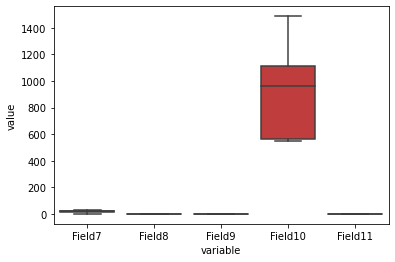

In [10]:
df = field[[ 'Field7', 'Field8', 'Field9', 'Field10', 'Field11']]

d= pd.melt(df)

d.value=d.value.astype('float64')
sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()

## Coverage

In [11]:
coverage =quote_conversion[['CoverageField1A', 'CoverageField1B', 'CoverageField2A', 'CoverageField2B', 'CoverageField3A', 'CoverageField3B', 'CoverageField4A', 'CoverageField4B', 'CoverageField5A', 'CoverageField5B', 'CoverageField6A', 'CoverageField6B', 'CoverageField8', 'CoverageField9', 'CoverageField11A', 'CoverageField11B']]

cDummy = pd.get_dummies(coverage[['CoverageField8','CoverageField9']],drop_first=True)
coverage =  pd.concat([coverage,cDummy], axis=1 )
coverage = coverage.drop(['CoverageField8','CoverageField9'], 1)

coverage.head()

,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,CoverageField5A,CoverageField5B,CoverageField6A,CoverageField6B,CoverageField11A,CoverageField11B,CoverageField8_U,CoverageField8_V,CoverageField8_W,CoverageField8_X,CoverageField8_Y,CoverageField8_Z,CoverageField9_B,CoverageField9_C,CoverageField9_D,CoverageField9_E,CoverageField9_F,CoverageField9_G,CoverageField9_H,CoverageField9_I,CoverageField9_J,CoverageField9_K,CoverageField9_L
0,17,23,17,23,15,22,16,22,13,22,13,23,2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,6,8,6,8,5,7,5,8,13,22,13,23,5,9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,7,12,7,12,6,10,7,11,25,25,13,23,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3,2,3,2,2,2,3,2,13,22,13,23,15,23,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,8,13,8,13,7,11,7,13,13,22,13,23,4,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


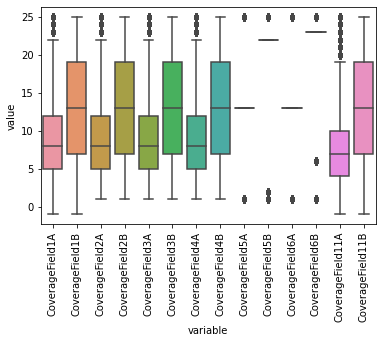

In [12]:
df = coverage[[ 'CoverageField1A', 'CoverageField1B', 'CoverageField2A', 'CoverageField2B', 'CoverageField3A', 'CoverageField3B', 'CoverageField4A', 'CoverageField4B', 'CoverageField5A', 'CoverageField5B', 'CoverageField6A', 'CoverageField6B', 'CoverageField11A', 'CoverageField11B']]

d= pd.melt(df)

d.value=d.value.astype('float64')


ax = sns.boxplot(x="variable", y="value", data=pd.melt(df))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()

In [13]:
coverage = coverage[[ 'CoverageField1A', 'CoverageField1B', 'CoverageField2A', 'CoverageField2B', 'CoverageField3A', 'CoverageField3B', 'CoverageField4A', 'CoverageField4B',  'CoverageField11A', 'CoverageField11B']]

## Sales

In [14]:
sales = quote_conversion[['SalesField1A', 'SalesField1B', 'SalesField2A', 'SalesField2B', 'SalesField3', 'SalesField4', 'SalesField5', 'SalesField6', 'SalesField7', 'SalesField8', 'SalesField9', 'SalesField10', 'SalesField11', 'SalesField12', 'SalesField13', 'SalesField14', 'SalesField15']]

# SalesField7

sDummy = pd.get_dummies(sales[['SalesField7']],drop_first=True)
sales =  pd.concat([sales,sDummy], axis=1 )
sales = sales.drop(['SalesField7'], 1)

sales.head()

,SalesField1A,SalesField1B,SalesField2A,SalesField2B,SalesField3,SalesField4,SalesField5,SalesField6,SalesField8,SalesField9,SalesField10,SalesField11,SalesField12,SalesField13,SalesField14,SalesField15,SalesField7_M,SalesField7_P,SalesField7_Q,SalesField7_R,SalesField7_T,SalesField7_V
0,7,18,3,8,0,5,5,24,48649,0,0,0,0,0,0,0,0,0,0,0,0,1
1,5,14,6,18,1,5,5,11,26778,0,0,1,1,0,0,0,0,1,0,0,0,0
2,3,10,4,11,1,5,5,11,8751,0,0,2,2,0,0,0,0,0,0,0,0,0
3,8,19,14,24,0,5,5,23,43854,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3,6,3,6,1,5,5,7,12505,1,0,0,0,0,0,0,0,0,0,1,0,0


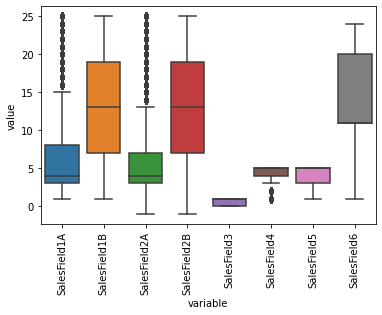

In [15]:
df = sales[['SalesField1A', 'SalesField1B', 'SalesField2A', 'SalesField2B', 'SalesField3', 'SalesField4', 'SalesField5', 'SalesField6']]

d= pd.melt(df)

d.value=d.value.astype('float64')


ax = sns.boxplot(x="variable", y="value", data=pd.melt(df))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()

## Personal

In [16]:
personal = quote_conversion[['PersonalField1', 'PersonalField2', 'PersonalField4A', 'PersonalField4B', 'PersonalField5', 'PersonalField6', 'PersonalField8', 'PersonalField9', 'PersonalField10A', 'PersonalField10B', 'PersonalField11', 'PersonalField12', 'PersonalField13', 'PersonalField14', 'PersonalField15', 'PersonalField16', 'PersonalField17', 'PersonalField18', 'PersonalField19', 'PersonalField22', 'PersonalField23', 'PersonalField24', 'PersonalField25', 'PersonalField26', 'PersonalField27', 'PersonalField28', 'PersonalField29', 'PersonalField30', 'PersonalField31', 'PersonalField32', 'PersonalField33', 'PersonalField34', 'PersonalField35', 'PersonalField36', 'PersonalField37', 'PersonalField38', 'PersonalField39', 'PersonalField40', 'PersonalField41', 'PersonalField42', 'PersonalField43', 'PersonalField44', 'PersonalField45', 'PersonalField46', 'PersonalField47', 'PersonalField48', 'PersonalField49', 'PersonalField50', 'PersonalField51', 'PersonalField52', 'PersonalField53', 'PersonalField54', 'PersonalField55', 'PersonalField56', 'PersonalField57', 'PersonalField58', 'PersonalField59', 'PersonalField60', 'PersonalField61', 'PersonalField62', 'PersonalField63', 'PersonalField64', 'PersonalField65', 'PersonalField66', 'PersonalField67', 'PersonalField68', 'PersonalField69', 'PersonalField70', 'PersonalField71', 'PersonalField72', 'PersonalField73', 'PersonalField74', 'PersonalField75', 'PersonalField76', 'PersonalField77', 'PersonalField78', 'PersonalField79', 'PersonalField80', 'PersonalField81', 'PersonalField82', 'PersonalField83']]

# PersonalField16	PersonalField17	PersonalField18	PersonalField19


pDummy = pd.get_dummies(personal[['PersonalField16','PersonalField17','PersonalField18','PersonalField19']],drop_first=True)
personal =  pd.concat([personal,pDummy], axis=1 )
personal = personal.drop(['PersonalField16','PersonalField17','PersonalField18','PersonalField19'], 1)

personal.head()

,PersonalField1,PersonalField2,PersonalField4A,PersonalField4B,PersonalField5,PersonalField6,PersonalField8,PersonalField9,PersonalField10A,PersonalField10B,PersonalField11,PersonalField12,PersonalField13,PersonalField14,PersonalField15,PersonalField22,PersonalField23,PersonalField24,PersonalField25,PersonalField26,PersonalField27,PersonalField28,PersonalField29,PersonalField30,PersonalField31,PersonalField32,PersonalField33,PersonalField34,PersonalField35,PersonalField36,PersonalField37,PersonalField38,PersonalField39,PersonalField40,PersonalField41,PersonalField42,PersonalField43,PersonalField44,PersonalField45,PersonalField46,PersonalField47,PersonalField48,PersonalField49,PersonalField50,PersonalField51,PersonalField52,PersonalField53,PersonalField54,PersonalField55,PersonalField56,PersonalField57,PersonalField58,PersonalField59,PersonalField60,PersonalField61,PersonalField62,PersonalField63,PersonalField64,PersonalField65,PersonalField66,PersonalField67,PersonalField68,PersonalField69,PersonalField70,PersonalField71,PersonalField72,PersonalField73,PersonalField74,PersonalField75,PersonalField76,PersonalField77,PersonalField78,PersonalField79,PersonalField80,PersonalField81,PersonalField82,PersonalField83,PersonalField16_XC,PersonalField16_XD,PersonalField16_XE,PersonalField16_XF,PersonalField16_XH,PersonalField16_XI,PersonalField16_XJ,PersonalField16_XK,PersonalField16_XL,PersonalField16_XM,PersonalField16_XN,PersonalField16_XO,PersonalField16_XP,PersonalField16_XQ,PersonalField16_XR,PersonalField16_XS,PersonalField16_XT,PersonalField16_XU,PersonalField16_XV,PersonalField16_XW,PersonalField16_XX,PersonalField16_XY,PersonalField16_XZ,PersonalField16_YE,PersonalField16_YF,PersonalField16_YH,PersonalField16_YI,PersonalField16_ZA,PersonalField16_ZB,PersonalField16_ZC,PersonalField16_ZD,PersonalField16_ZE,PersonalField16_ZF,PersonalField16_ZG,PersonalField16_ZH,PersonalField16_ZI,PersonalField16_ZJ,PersonalField16_ZK,PersonalField16_ZL,PersonalField16_ZN,PersonalField16_ZO,PersonalField16_ZP,PersonalField16_ZQ,PersonalField16_ZR,PersonalField16_ZS,PersonalField16_ZT,PersonalField16_ZU,PersonalField16_ZV,PersonalField16_ZW,PersonalField17_XC,PersonalField17_XD,PersonalField17_XE,PersonalField17_XG,PersonalField17_XH,PersonalField17_XI,PersonalField17_XJ,PersonalField17_XK,PersonalField17_XL,PersonalField17_XM,PersonalField17_XN,PersonalField17_XO,PersonalField17_XP,PersonalField17_XQ,PersonalField17_XR,PersonalField17_XS,PersonalField17_XT,PersonalField17_XU,PersonalField17_XV,PersonalField17_XW,PersonalField17_XX,PersonalField17_XY,PersonalField17_YE,PersonalField17_YF,PersonalField17_YG,PersonalField17_YH,PersonalField17_YI,PersonalField17_YJ,PersonalField17_YK,PersonalField17_YL,PersonalField17_YM,PersonalField17_YN,PersonalField17_YP,PersonalField17_YQ,PersonalField17_YR,PersonalField17_YS,PersonalField17_YT,PersonalField17_YU,PersonalField17_YV,PersonalField17_YW,PersonalField17_YX,PersonalField17_YY,PersonalField17_YZ,PersonalField17_ZA,PersonalField17_ZB,PersonalField17_ZC,PersonalField17_ZD,PersonalField17_ZE,PersonalField17_ZF,PersonalField17_ZG,PersonalField17_ZH,PersonalField17_ZI,PersonalField17_ZK,PersonalField17_ZL,PersonalField17_ZM,PersonalField17_ZN,PersonalField17_ZO,PersonalField17_ZP,PersonalField17_ZQ,PersonalField17_ZR,PersonalField17_ZS,PersonalField17_ZT,PersonalField17_ZU,PersonalField17_ZV,PersonalField17_ZW,PersonalField18_XD,PersonalField18_XE,PersonalField18_XF,PersonalField18_XG,PersonalField18_XH,PersonalField18_XI,PersonalField18_XJ,PersonalField18_XK,PersonalField18_XL,PersonalField18_XM,PersonalField18_XN,PersonalField18_XO,PersonalField18_XP,PersonalField18_XQ,PersonalField18_XR,PersonalField18_XS,PersonalField18_XT,PersonalField18_XU,PersonalField18_XV,PersonalField18_XW,PersonalField18_XX,PersonalField18_XY,PersonalField18_XZ,PersonalField18_YE,PersonalField18_YF,PersonalField18_YG,PersonalField18_YH,PersonalField18_YI,PersonalField18_YJ,PersonalField18_YK,PersonalField18_YL,PersonalField18_

In [17]:
df = personal[['PersonalField1', 'PersonalField2', 'PersonalField4A', 'PersonalField4B', 'PersonalField5', 'PersonalField6', 'PersonalField8', 'PersonalField9', 'PersonalField10A', 'PersonalField10B', 'PersonalField11', 'PersonalField12', 'PersonalField13', 'PersonalField14', 'PersonalField15',  'PersonalField22', 'PersonalField23', 'PersonalField24', 'PersonalField25', 'PersonalField26', 'PersonalField27', 'PersonalField28', 'PersonalField29', 'PersonalField30', 'PersonalField31', 'PersonalField32', 'PersonalField33', 'PersonalField34', 'PersonalField35', 'PersonalField36', 'PersonalField37', 'PersonalField38', 'PersonalField39', 'PersonalField40', 'PersonalField41', 'PersonalField42', 'PersonalField43', 'PersonalField44', 'PersonalField45', 'PersonalField46', 'PersonalField47', 'PersonalField48', 'PersonalField49', 'PersonalField50', 'PersonalField51', 'PersonalField52', 'PersonalField53', 'PersonalField54', 'PersonalField55', 'PersonalField56', 'PersonalField57', 'PersonalField58', 'PersonalField59', 'PersonalField60', 'PersonalField61', 'PersonalField62', 'PersonalField63', 'PersonalField64', 'PersonalField65', 'PersonalField66', 'PersonalField67', 'PersonalField68', 'PersonalField69', 'PersonalField70', 'PersonalField71', 'PersonalField72', 'PersonalField73', 'PersonalField74', 'PersonalField75', 'PersonalField76', 'PersonalField77', 'PersonalField78', 'PersonalField79', 'PersonalField80', 'PersonalField81', 'PersonalField82', 'PersonalField83']]

d= pd.melt(df)

d.value=d.value.astype('float64')


ax = sns.boxplot(x="variable", y="value", data=pd.melt(df))
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-17-3333543e974d>", line 8, in <module>
    ax = sns.boxplot(x="variable", y="value", data=pd.melt(df))
  File "C:\ProgramData\Anaconda\lib\site-packages\seaborn\categorical.py", line 2233, in boxplot
    plotter = _BoxPlotter(x, y, hue, data, order, hue_order,
  File "C:\ProgramData\Anaconda\lib\site-packages\seaborn\categorical.py", line 436, in __init__
    self.establish_variables(x, y, hue, data, orient, order, hue_order)
  File "C:\ProgramData\Anaconda\lib\site-packages\seaborn\categorical.py", line 203, in establish_variables
    plot_data, value_label = self._group_longform(vals, groups,
  File "C:\ProgramData\Anaconda\lib\site-packages\seaborn\categorical.py", line 250, in _group_longform
    grouped_vals = vals.groupby(grouper)
  File "C:\ProgramData\Anaconda\l

TypeError: object of type 'NoneType' has no len()

## Property

In [ ]:
# property = quote_conversion[['PropertyField1A', 'PropertyField1B', 'PropertyField2A', 'PropertyField2B', 'PropertyField5', 'PropertyField6', 'PropertyField7', 'PropertyField8', 'PropertyField9', 'PropertyField10', 'PropertyField11A', 'PropertyField11B', 'PropertyField12', 'PropertyField13', 'PropertyField14', 'PropertyField15', 'PropertyField16A', 'PropertyField16B', 'PropertyField17', 'PropertyField18', 'PropertyField19', 'PropertyField20', 'PropertyField21A', 'PropertyField21B', 'PropertyField22', 'PropertyField23', 'PropertyField24A', 'PropertyField24B', 'PropertyField25', 'PropertyField26A', 'PropertyField26B', 'PropertyField27', 'PropertyField28', 'PropertyField30', 'PropertyField31', 'PropertyField33', 'PropertyField35', 'PropertyField37', 'PropertyField39A', 'PropertyField39B']]

# property[['PropertyField5','PropertyField30','PropertyField37']] = property[['PropertyField5','PropertyField30','PropertyField37']].apply(binary_map)

# pDummy = pd.get_dummies(property[['PropertyField7','PropertyField14','PropertyField28','PropertyField31','PropertyField33']],drop_first=True)
# property =  pd.concat([property,pDummy], axis=1 )
# property = property.drop(['PropertyField7','PropertyField14','PropertyField28','PropertyField31','PropertyField33'], 1)

# property.head()

In [18]:
conversion =  pd.concat([conversion,field,coverage,sales], axis=1 )

In [ ]:
# geographic= quote_conversion[['GeographicField1A', 'GeographicField1B', 'GeographicField2A', 'GeographicField2B', 'GeographicField3A', 'GeographicField3B', 'GeographicField4A', 'GeographicField4B', 'GeographicField5A', 'GeographicField5B', 'GeographicField6A', 'GeographicField6B', 'GeographicField7A', 'GeographicField7B', 'GeographicField8A', 'GeographicField8B', 'GeographicField9A', 'GeographicField9B', 'GeographicField10A', 'GeographicField10B', 'GeographicField11A', 'GeographicField11B', 'GeographicField12A', 'GeographicField12B', 'GeographicField13A', 'GeographicField13B', 'GeographicField14A', 'GeographicField14B', 'GeographicField15A', 'GeographicField15B', 'GeographicField16A', 'GeographicField16B', 'GeographicField17A', 'GeographicField17B', 'GeographicField18A', 'GeographicField18B', 'GeographicField19A', 'GeographicField19B', 'GeographicField20A', 'GeographicField20B', 'GeographicField21A', 'GeographicField21B', 'GeographicField22A', 'GeographicField22B', 'GeographicField23A', 'GeographicField23B', 'GeographicField24A', 'GeographicField24B', 'GeographicField25A', 'GeographicField25B', 'GeographicField26A', 'GeographicField26B', 'GeographicField27A', 'GeographicField27B', 'GeographicField28A', 'GeographicField28B', 'GeographicField29A', 'GeographicField29B', 'GeographicField30A', 'GeographicField30B', 'GeographicField31A', 'GeographicField31B', 'GeographicField32A', 'GeographicField32B', 'GeographicField33A', 'GeographicField33B', 'GeographicField34A', 'GeographicField34B', 'GeographicField35A', 'GeographicField35B', 'GeographicField36A', 'GeographicField36B', 'GeographicField37A', 'GeographicField37B', 'GeographicField38A', 'GeographicField38B', 'GeographicField39A', 'GeographicField39B', 'GeographicField40A', 'GeographicField40B', 'GeographicField41A', 'GeographicField41B', 'GeographicField42A', 'GeographicField42B', 'GeographicField43A', 'GeographicField43B', 'GeographicField44A', 'GeographicField44B', 'GeographicField45A', 'GeographicField45B', 'GeographicField46A', 'GeographicField46B', 'GeographicField47A', 'GeographicField47B', 'GeographicField48A', 'GeographicField48B', 'GeographicField49A', 'GeographicField49B', 'GeographicField50A', 'GeographicField50B', 'GeographicField51A', 'GeographicField51B', 'GeographicField52A', 'GeographicField52B', 'GeographicField53A', 'GeographicField53B', 'GeographicField54A', 'GeographicField54B', 'GeographicField55A', 'GeographicField55B', 'GeographicField56A', 'GeographicField56B', 'GeographicField57A', 'GeographicField57B', 'GeographicField58A', 'GeographicField58B', 'GeographicField59A', 'GeographicField59B', 'GeographicField60A', 'GeographicField60B', 'GeographicField61A', 'GeographicField61B', 'GeographicField62A', 'GeographicField62B', 'GeographicField63', 'GeographicField64']]
# geographic.head()

### Create X and Y

In [42]:
X = conversion.drop(['QuoteNumber','QuoteConversion_Flag'], axis=1)

X.head()

,Field7,Field8,Field9,Field10,Field11,Field12,Field6_B,Field6_C,Field6_D,Field6_E,Field6_F,Field6_J,Field6_K,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,CoverageField11A,CoverageField11B,SalesField1A,SalesField1B,SalesField2A,SalesField2B,SalesField3,SalesField4,SalesField5,SalesField6,SalesField8,SalesField9,SalesField10,SalesField11,SalesField12,SalesField13,SalesField14,SalesField15,SalesField7_M,SalesField7_P,SalesField7_Q,SalesField7_R,SalesField7_T,SalesField7_V
0,23,0.9403,0.0006,965.0,1.0200,0,1,0,0,0,0,0,0,17,23,17,23,15,22,16,22,2,1,7,18,3,8,0,5,5,24,48649,0,0,0,0,0,0,0,0,0,0,0,0,1
1,7,1.0006,0.0040,548.0,1.2433,0,0,0,0,0,1,0,0,6,8,6,8,5,7,5,8,5,9,5,14,6,18,1,5,5,11,26778,0,0,1,1,0,0,0,0,1,0,0,0,0
2,7,1.0006,0.0040,548.0,1.2433,0,0,0,0,0,1,0,0,7,12,7,12,6,10,7,11,4,6,3,10,4,11,1,5,5,11,8751,0,0,2,2,0,0,0,0,0,0,0,0,0
3,10,0.9769,0.0004,1165.0,1.2665,0,0,0,0,0,0,1,0,3,2,3,2,2,2,3,2,15,23,8,19,14,24,0,5,5,23,43854,0,0,0,0,0,0,0,0,0,0,0,0,1
4,23,0.9472,0.0006,1487.0,1.3045,0,0,0,0,1,0,0,0,8,13,8,13,7,11,7,13,4,6,3,6,3,6,1,5,5,7,12505,1,0,0,0,0,0,0,0,0,0,1,0,0


In [43]:
Y = conversion['QuoteConversion_Flag']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: QuoteConversion_Flag, dtype: int64

###  Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

# X[['Field7', 'Field8', 'Field9', 'Field10', 'Field11','CoverageField1A', 'CoverageField1B', 'CoverageField2A', 'CoverageField2B', 'CoverageField3A', 'CoverageField3B', 'CoverageField4A', 'CoverageField4B',  'CoverageField11A', 'CoverageField11B',
#   'SalesField1A', 'SalesField1B', 'SalesField2A', 'SalesField2B', 'SalesField3', 'SalesField4', 'SalesField5', 'SalesField6']] = 
# scaler.fit_transform(X[['Field7', 'Field8', 'Field9', 'Field10', 'Field11','CoverageField1A', 'CoverageField1B', 'CoverageField2A', 'CoverageField2B', 'CoverageField3A', 'CoverageField3B', 'CoverageField4A', 'CoverageField4B',  'CoverageField11A', 'CoverageField11B',
#   'SalesField1A', 'SalesField1B', 'SalesField2A', 'SalesField2B', 'SalesField3', 'SalesField4', 'SalesField5', 'SalesField6']])

X[['Field7', 'Field8', 'Field9', 'Field10', 'Field11','CoverageField1A', 'CoverageField1B', 'CoverageField2A', 'CoverageField2B', 'CoverageField3A', 'CoverageField3B', 'CoverageField4A', 'CoverageField4B',  'CoverageField11A', 'CoverageField11B']] = scaler.fit_transform(X[['Field7', 'Field8', 'Field9', 'Field10', 'Field11','CoverageField1A', 'CoverageField1B', 'CoverageField2A', 'CoverageField2B', 'CoverageField3A', 'CoverageField3B', 'CoverageField4A', 'CoverageField4B',  'CoverageField11A', 'CoverageField11B']])

X.head()

,Field7,Field8,Field9,Field10,Field11,Field12,Field6_B,Field6_C,Field6_D,Field6_E,Field6_F,Field6_J,Field6_K,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,CoverageField11A,CoverageField11B,SalesField1A,SalesField1B,SalesField2A,SalesField2B,SalesField3,SalesField4,SalesField5,SalesField6,SalesField8,SalesField9,SalesField10,SalesField11,SalesField12,SalesField13,SalesField14,SalesField15,SalesField7_M,SalesField7_P,SalesField7_Q,SalesField7_R,SalesField7_T,SalesField7_V
0,0.637518,0.052696,-0.572467,0.037475,-1.221557,0,1,0,0,0,0,0,0,1.432345,1.385130,1.429005,1.384522,1.065806,1.246975,1.267141,1.247738,-1.097180,-1.652884,7,18,3,8,0,5,5,24,48649,0,0,0,0,0,0,0,0,0,0,0,0,1
1,-1.529685,1.678661,1.715917,-1.397630,0.689719,0,0,0,0,0,1,0,0,-0.540219,-0.692648,-0.549231,-0.695431,-0.726413,-0.833064,-0.714889,-0.696102,-0.530576,-0.549322,5,14,6,18,1,5,5,11,26778,0,0,1,1,0,0,0,0,1,0,0,0,0
2,-1.529685,1.678661,1.715917,-1.397630,0.689719,0,0,0,0,0,1,0,0,-0.360895,-0.138574,-0.369391,-0.140777,-0.547191,-0.417057,-0.354520,-0.279565,-0.719444,-0.963158,3,10,4,11,1,5,5,11,8751,0,0,2,2,0,0,0,0,0,0,0,0,0
3,-1.123334,1.039600,-0.707077,0.725775,0.888293,0,0,0,0,0,0,1,0,-1.078191,-1.523760,-1.088750,-1.527412,-1.264079,-1.526411,-1.075259,-1.529177,1.358101,1.381911,8,19,14,24,0,5,5,23,43854,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.637518,0.238752,-0.572467,1.833937,1.213544,0,0,0,0,1,0,0,0,-0.181571,-0.000056,-0.189552,-0.002113,-0.367969,-0.278387,-0.354520,-0.001874,-0.719444,-0.963158,3,6,3,6,1,5,5,7,12505,1,0,0,0,0,0,0,0,0,0,1,0,0


## RFE

In [52]:
import statsmodels.api as sm

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [91]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X, Y)

In [92]:
col = X.columns[rfe.support_]

In [93]:
X.columns[~rfe.support_]

Index(['Field8', 'Field9', 'Field10', 'Field11', 'Field12', 'Field6_E',
       'CoverageField1B', 'CoverageField2A', 'CoverageField4B',
       'CoverageField11A', 'SalesField1B', 'SalesField2A', 'SalesField2B',
       'SalesField6', 'SalesField8', 'SalesField11', 'SalesField12',
       'SalesField14', 'SalesField15', 'SalesField7_M', 'SalesField7_P',
       'SalesField7_Q', 'SalesField7_R', 'SalesField7_T', 'SalesField7_V'],
      dtype='object')

In [94]:
X_train_sm = sm.add_constant(X[col])
logm2 = sm.GLM(Y,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                   
================================================================================
Dep. Variable:     QuoteConversion_Flag   No. Observations:               260753
Model:                              GLM   Df Residuals:                   260732
Model Family:                  Binomial   Df Model:                           20
Link Function:                    logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:            -1.0016e+05
Date:                  Tue, 29 Dec 2020   Deviance:                   2.0032e+05
Time:                          19:49:36   Pearson chi2:                 2.48e+05
No. Iterations:                       7                                         
Covariance Type:              nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.0543      0.040     26.520      0.000       0.976       1.132
Field7              -0.1872      0.007    -26.757      0.000      -0.201      -0.173
Field6_B             0.2770      0.023     12.065      0.000       0.232       0.322
Field6_C            -0.1520      0.065     -2.337      0.019      -0.279      -0.025
Field6_D             0.5572      0.135      4.124      0.000       0.292       0.822
Field6_F             0.4230      0.023     18.659      0.000       0.379       0.467
Field6_J             0.1980      0.031      6.409      0.000       0.137       0.259
Field6_K             0.4382      0.059      7.450      0.000       0.323       0.554
CoverageField1A      0.1360      0.054      2.518      0.012       0.030       0.242
CoverageField2B     -0.2193      0.026     -8.475      0.000      -0.270      -0.169
CoverageField3A      0.1700      0.025      6.713      0.000       0.120       0.220
CoverageField3B      0.2692      0.025     10.709      0.000       0.220       0.318
CoverageField4A     -0.1181      0.053     -2.240      0.025      -0.221      -0.015
CoverageField11B     0.3617      0.008     46.096      0.000       0.346       0.377
SalesField1A        -0.1650      0.003    -54.753      0.000      -0.171      -0.159
SalesField3          0.3862      0.015     25.991      0.000       0.357       0.415
SalesField4          0.1792      0.007     25.163      0.000       0.165       0.193
SalesField5         -0.8037      0.009    -92.517      0.000      -0.821      -0.787
SalesField9         -0.3440      0.018    -18.843      0.000      -0.380      -0.308
SalesField10         0.2779      0.008     36.480      0.000       0.263       0.293
SalesField13        -0.1819      0.022     -8.363      0.000      -0.224      -0.139
====================================================================================
"""

In [95]:
Y_pred = res.predict(X_train_sm)
Y_pred[:5]

0    0.032142
1    0.101507
2    0.119438
3    0.057854
4    0.042753
dtype: float64

In [96]:
Y_pred = Y_pred.values.reshape(-1)
Y_pred[:5]

array([0.03214156, 0.10150669, 0.11943765, 0.0578536 , 0.0427525 ])

In [97]:
Y_pred_final = pd.DataFrame({'QuoteConversion_Flag':Y.values, 'Conversion_Prob':Y_pred})
Y_pred_final['QuoteNumber'] = conversion['QuoteNumber']
Y_pred_final.head()

,QuoteConversion_Flag,Conversion_Prob,QuoteNumber
0,0,0.032142,1
1,0,0.101507,2
2,0,0.119438,4
3,0,0.057854,6
4,0,0.042753,8


In [98]:
Y_pred_final['predicted'] = Y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
Y_pred_final.head()

,QuoteConversion_Flag,Conversion_Prob,QuoteNumber,predicted
0,0,0.032142,1,0
1,0,0.101507,2,0
2,0,0.119438,4,0
3,0,0.057854,6,0
4,0,0.042753,8,0


In [99]:
from sklearn import metrics

In [100]:
confusion = metrics.confusion_matrix(Y_pred_final.QuoteConversion_Flag, Y_pred_final.predicted )
confusion

array([[201846,  10013],
       [ 36994,  11900]], dtype=int64)

In [101]:
print(metrics.accuracy_score(Y_pred_final.QuoteConversion_Flag, Y_pred_final.predicted))

0.8197259475442277


### VIF

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [103]:
vif = pd.DataFrame()
vif['Features'] = X[col].columns
vif['VIF'] = [variance_inflation_factor(X[col].values, i) for i in range(X[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,CoverageField1A,69.21
11,CoverageField4A,63.99
16,SalesField5,48.44
15,SalesField4,45.27
10,CoverageField3B,23.17
8,CoverageField2B,20.44
9,CoverageField3A,20.32
13,SalesField1A,4.97
6,Field6_K,4.19
1,Field6_B,3.92


In [104]:
col = col.drop(['CoverageField1A'], 1)
col

Index(['Field7', 'Field6_B', 'Field6_C', 'Field6_D', 'Field6_F', 'Field6_J',
       'Field6_K', 'CoverageField2B', 'CoverageField3A', 'CoverageField3B',
       'CoverageField4A', 'CoverageField11B', 'SalesField1A', 'SalesField3',
       'SalesField4', 'SalesField5', 'SalesField9', 'SalesField10',
       'SalesField13'],
      dtype='object')

In [105]:
X1_sm = sm.add_constant(X[col])
logm2 = sm.GLM(Y,X1_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                   
================================================================================
Dep. Variable:     QuoteConversion_Flag   No. Observations:               260753
Model:                              GLM   Df Residuals:                   260733
Model Family:                  Binomial   Df Model:                           19
Link Function:                    logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:            -1.0016e+05
Date:                  Tue, 29 Dec 2020   Deviance:                   2.0032e+05
Time:                          19:50:35   Pearson chi2:                 2.47e+05
No. Iterations:                       7                                         
Covariance Type:              nonrobust                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.0571      0.040     26.602      0.000       0.979       1.135
Field7              -0.1872      0.007    -26.767      0.000      -0.201      -0.174
Field6_B             0.2779      0.023     12.108      0.000       0.233       0.323
Field6_C            -0.2499      0.052     -4.781      0.000      -0.352      -0.147
Field6_D             0.5555      0.135      4.114      0.000       0.291       0.820
Field6_F             0.4233      0.023     18.671      0.000       0.379       0.468
Field6_J             0.1970      0.031      6.378      0.000       0.136       0.258
Field6_K             0.3413      0.045      7.641      0.000       0.254       0.429
CoverageField2B     -0.2016      0.025     -8.082      0.000      -0.250      -0.153
CoverageField3A      0.1883      0.024      7.760      0.000       0.141       0.236
CoverageField3B      0.2551      0.025     10.405      0.000       0.207       0.303
CoverageField4A     -0.0027      0.026     -0.102      0.918      -0.053       0.048
CoverageField11B     0.3617      0.008     46.099      0.000       0.346       0.377
SalesField1A        -0.1647      0.003    -54.721      0.000      -0.171      -0.159
SalesField3          0.3862      0.015     25.995      0.000       0.357       0.415
SalesField4          0.1792      0.007     25.165      0.000       0.165       0.193
SalesField5         -0.8031      0.009    -92.481      0.000      -0.820      -0.786
SalesField9         -0.3437      0.018    -18.828      0.000      -0.380      -0.308
SalesField10         0.2776      0.008     36.446      0.000       0.263       0.293
SalesField13        -0.1810      0.022     -8.323      0.000      -0.224      -0.138
====================================================================================
"""

In [127]:
Y_pred = res.predict(X1_sm).values.reshape(-1)
Y_pred_final['Conversion_Prob'] = Y_pred
Y_pred_final['predicted'] = Y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.52 else 0)

Y_pred_final.head()

,QuoteConversion_Flag,Conversion_Prob,QuoteNumber,predicted
0,0,0.031730,1,0
1,0,0.100109,2,0
2,0,0.120348,4,0
3,0,0.057880,6,0
4,0,0.042261,8,0


In [128]:
print(metrics.accuracy_score(Y_pred_final.QuoteConversion_Flag, Y_pred_final.predicted))

0.8202781943064893


In [129]:
vif = pd.DataFrame()
vif['Features'] = X[col].columns
vif['VIF'] = [variance_inflation_factor(X[col].values, i) for i in range(X[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,SalesField5,48.34
14,SalesField4,45.26
9,CoverageField3B,22.12
7,CoverageField2B,19.29
8,CoverageField3A,18.22
10,CoverageField4A,15.87
12,SalesField1A,4.96
1,Field6_B,3.92
5,Field6_J,3.65
13,SalesField3,3.56


In [130]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [131]:
fpr, tpr, thresholds = metrics.roc_curve( Y_pred_final.QuoteConversion_Flag, Y_pred_final.Conversion_Prob, drop_intermediate = False )

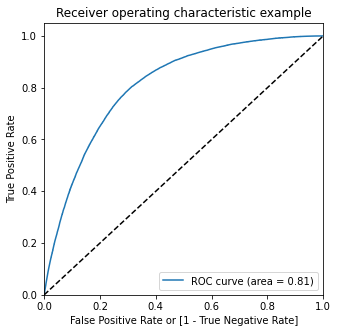

In [132]:
draw_roc(Y_pred_final.QuoteConversion_Flag, Y_pred_final.Conversion_Prob)

## Finding Optimal Cut-off point

In [133]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_pred_final[i]= Y_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
Y_pred_final.head()

,QuoteConversion_Flag,Conversion_Prob,QuoteNumber,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.031730,1,0,1,0,0,0,0,0,0,0,0,0
1,0,0.100109,2,0,1,1,0,0,0,0,0,0,0,0
2,0,0.120348,4,0,1,1,0,0,0,0,0,0,0,0
3,0,0.057880,6,0,1,0,0,0,0,0,0,0,0,0
4,0,0.042261,8,0,1,0,0,0,0,0,0,0,0,0


In [135]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
for i in numbers:
    cm1 = metrics.confusion_matrix(Y_pred_final.QuoteConversion_Flag, Y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.187511     1.000000     0.000000
0.1   0.1  0.600660     0.905878     0.530221
0.2   0.2  0.748620     0.725897     0.753865
0.3   0.3  0.789740     0.577781     0.838657
0.4   0.4  0.811197     0.427946     0.899646
0.5   0.5  0.819837     0.243240     0.952907
0.6   0.6  0.818223     0.094981     0.985136
0.7   0.7  0.813406     0.012415     0.998263
0.8   0.8  0.812585     0.001145     0.999854
0.9   0.9  0.812485     0.000102     0.999972


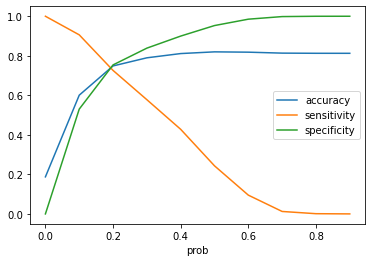

In [136]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

In [137]:
Y_pred_final['final_predicted'] = Y_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.2 else 0)

Y_pred_final.head()

,QuoteConversion_Flag,Conversion_Prob,QuoteNumber,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.031730,1,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.100109,2,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.120348,4,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.057880,6,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.042261,8,0,1,0,0,0,0,0,0,0,0,0,0


In [138]:
metrics.accuracy_score(Y_pred_final.QuoteConversion_Flag, Y_pred_final.final_predicted)

0.7486203418560861

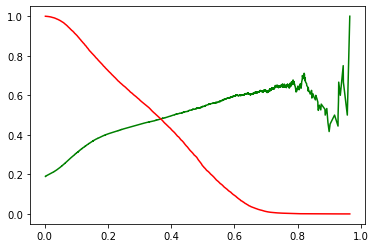

In [144]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(Y_pred_final.QuoteConversion_Flag, Y_pred_final.Conversion_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

# predictions on the test set


In [153]:
test_df = pd.read_csv('test.csv')

In [154]:
test_df.Field10 =test_df.Field10.apply(lambda x:x.replace(',',''))
test_df.Field10=test_df.Field10.astype('float64')

test_df[['Field12']] = test_df[[ 'Field12']].apply(binary_map)


fDummy = pd.get_dummies(test_df[['Field6']],drop_first=True)
test_df =  pd.concat([test_df,fDummy], axis=1 )
test_df = test_df.drop(['Field6'], 1)

In [155]:
cDummy = pd.get_dummies(test_df[['CoverageField8','CoverageField9']],drop_first=True)
test_df =  pd.concat([test_df,cDummy], axis=1 )
test_df = test_df.drop(['CoverageField8','CoverageField9','CoverageField5A', 'CoverageField5B', 'CoverageField6A', 'CoverageField6B'], 1)


In [156]:
test_df.head()

,QuoteNumber,Original_Quote_Date,Field7,Field8,Field9,Field10,Field11,Field12,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,CoverageField11A,CoverageField11B,SalesField1A,SalesField1B,SalesField2A,SalesField2B,SalesField3,SalesField4,SalesField5,SalesField6,SalesField7,SalesField8,SalesField9,SalesField10,SalesField11,SalesField12,SalesField13,SalesField14,SalesField15,PersonalField1,PersonalField2,PersonalField4A,PersonalField4B,PersonalField5,PersonalField6,PersonalField7,PersonalField8,PersonalField9,PersonalField10A,PersonalField10B,PersonalField11,PersonalField12,PersonalField13,PersonalField14,PersonalField15,PersonalField16,PersonalField17,PersonalField18,PersonalField19,PersonalField22,PersonalField23,PersonalField24,PersonalField25,PersonalField26,PersonalField27,PersonalField28,PersonalField29,PersonalField30,PersonalField31,PersonalField32,PersonalField33,PersonalField34,PersonalField35,PersonalField36,PersonalField37,PersonalField38,PersonalField39,PersonalField40,PersonalField41,PersonalField42,PersonalField43,PersonalField44,PersonalField45,PersonalField46,PersonalField47,PersonalField48,PersonalField49,PersonalField50,PersonalField51,PersonalField52,PersonalField53,PersonalField54,PersonalField55,PersonalField56,PersonalField57,PersonalField58,PersonalField59,PersonalField60,PersonalField61,PersonalField62,PersonalField63,PersonalField64,PersonalField65,PersonalField66,PersonalField67,PersonalField68,PersonalField69,PersonalField70,PersonalField71,PersonalField72,PersonalField73,PersonalField74,PersonalField75,PersonalField76,PersonalField77,PersonalField78,PersonalField79,PersonalField80,PersonalField81,PersonalField82,PersonalField83,PersonalField84,PropertyField1A,PropertyField1B,PropertyField2A,PropertyField2B,PropertyField3,PropertyField4,PropertyField5,PropertyField6,PropertyField7,PropertyField8,PropertyField9,PropertyField10,PropertyField11A,PropertyField11B,PropertyField12,PropertyField13,PropertyField14,PropertyField15,PropertyField16A,PropertyField16B,PropertyField17,PropertyField18,PropertyField19,PropertyField20,PropertyField21A,PropertyField21B,PropertyField22,PropertyField23,PropertyField24A,PropertyField24B,PropertyField25,PropertyField26A,PropertyField26B,PropertyField27,PropertyField28,PropertyField29,PropertyField30,PropertyField31,PropertyField32,PropertyField33,PropertyField34,PropertyField35,PropertyField36,PropertyField37,PropertyField38,PropertyField39A,PropertyField39B,GeographicField1A,GeographicField1B,GeographicField2A,GeographicField2B,GeographicField3A,GeographicField3B,GeographicField4A,GeographicField4B,GeographicField5A,GeographicField5B,GeographicField6A,GeographicField6B,GeographicField7A,GeographicField7B,GeographicField8A,GeographicField8B,GeographicField9A,GeographicField9B,GeographicField10A,GeographicField10B,GeographicField11A,GeographicField11B,GeographicField12A,GeographicField12B,GeographicField13A,GeographicField13B,GeographicField14A,GeographicField14B,GeographicField15A,GeographicField15B,GeographicField16A,GeographicField16B,GeographicField17A,GeographicField17B,GeographicField18A,GeographicField18B,GeographicField19A,GeographicField19B,GeographicField20A,GeographicField20B,GeographicField21A,GeographicField21B,GeographicField22A,GeographicField22B,GeographicField23A,GeographicField23B,GeographicField24A,GeographicField24B,GeographicField25A,GeographicField25B,GeographicField26A,GeographicField26B,GeographicField27A,GeographicField27B,GeographicField28A,GeographicField28B,GeographicField29A,GeographicField29B,GeographicField30A,GeographicField30B,GeographicField31A,GeographicField31B,GeographicField32A,GeographicField32B,GeographicField33A,GeographicField33B,GeographicField34A,GeographicField34B,GeographicField35A,GeographicField35B,GeographicField36A,GeographicField36B,GeographicField37A,GeographicField37B,GeographicField38A,GeographicField38B,GeographicField39A,GeographicField39B,Ge

In [157]:
test_df[['Field7', 'Field8', 'Field9', 'Field10', 'Field11','CoverageField1A', 'CoverageField1B', 'CoverageField2A', 'CoverageField2B', 'CoverageField3A', 'CoverageField3B', 'CoverageField4A', 'CoverageField4B',  'CoverageField11A', 'CoverageField11B']] = scaler.transform(test_df[['Field7', 'Field8', 'Field9', 'Field10', 'Field11','CoverageField1A', 'CoverageField1B', 'CoverageField2A', 'CoverageField2B', 'CoverageField3A', 'CoverageField3B', 'CoverageField4A', 'CoverageField4B',  'CoverageField11A', 'CoverageField11B']])

In [158]:
X_test = test_df[col]
X_test.head()

,Field7,Field6_B,Field6_C,Field6_D,Field6_F,Field6_J,Field6_K,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField11B,SalesField1A,SalesField3,SalesField4,SalesField5,SalesField9,SalesField10,SalesField13
0,-0.310633,0,0,0,0,0,0,-1.250085,-1.084857,-1.387741,-1.075259,1.243966,6,0,5,5,0,0,0
1,-0.987884,0,0,0,1,0,0,0.136550,-0.367969,-0.139718,-0.174336,-1.101103,3,1,5,5,1,0,0
2,-0.446083,0,0,0,1,0,0,0.691204,0.169696,0.414959,0.186033,-1.376993,5,1,5,5,0,1,0
3,0.366618,0,0,0,0,0,1,1.245858,0.707362,0.969636,2.348248,-0.549322,9,1,5,5,1,1,0
4,0.908418,1,0,0,0,0,0,-1.111421,-0.905635,-1.249072,-0.895074,1.106021,1,0,5,5,0,1,0


In [159]:
X_test_sm = sm.add_constant(X_test)

In [160]:
Y_test_pred = res.predict(X_test_sm)

In [168]:
Y_Test_final = pd.DataFrame({'QuoteNumber':test_df['QuoteNumber'], 'Conversion_Prob':Y_test_pred})
Y_Test_final['QuoteConversion_Flag'] = Y_Test_final.Conversion_Prob.map(lambda x: 1 if x > 0.38 else 0)
Y_Test_final =Y_Test_final.drop('Conversion_Prob',1)
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
Y_Test_final.to_csv('out.zip', index=False,
          compression=compression_opts)  